# Preprocesamiento de datos

- Análisis de ciencias de datos
- Profesores:
  - Rubí Isabela Gutiérrez López
  - Daniel Otero Fadul
- Juan Pablo Echeagaray González
- 4 de marzo del 2022

### Dependencias

In [44]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

print(f'''
# de versiones
Python: {sys.version}
pandas: {pd.__version__}
numpy: {np.__version__}
matplotlib: {mpl.__version__}
seaborn: {sns.__version__}
''')



# de versiones
Python: 3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]
pandas: 1.1.4
numpy: 1.22.2
matplotlib: 3.4.1
seaborn: 0.11.1



## Lectura de datos

In [45]:
df1 = pd.read_csv('Cars1.csv')
df2 = pd.read_csv('Cars2.csv')


## Preprocesamiento de datos

In [46]:
df1.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,data1,data2
0,18.0,8,307,130,3504,12,70,1,chevrolet chevelle malibu,NaN,NaN
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,NaN,NaN
2,18.0,8,318,150,3436,11,70,1,plymouth satellite,NaN,NaN
3,16.0,8,304,150,3433,12,70,1,amc rebel sst,NaN,NaN
4,17.0,8,302,140,3449,10.5,70,1,ford torino,NaN,NaN


In [47]:
df2.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,33.0,4,91,53,1795,17.4,76,3,honda civic
1,20.0,6,225,100,3651,17.7,76,1,dodge aspen se
2,18.0,6,250,78,3574,21,76,1,ford granada ghia
3,18.5,6,250,110,3645,16.2,76,1,pontiac ventura sj
4,17.5,6,258,95,3193,17.8,76,1,amc pacer d/l


In [48]:
df1.columns


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car', 'data1', 'data2'],
      dtype='object')

In [49]:
df2.columns


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car'],
      dtype='object')

### Unión de las bases de datos

Como ya sabemos que las bases de datos tienen las mismas columnas, podemos hacer uso de la función `pd.concat()` para hacer un _stack_ de las bases de datos. El que el primer dataframe tenga 2 columnas extra no afectará este proceso, `pandas` en automático insetará valores `NaN` para las observaciones agregadas.

In [50]:
df_join = pd.concat([df1, df2])
df_join


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,data1,data2
0,18.0,8,307,130,3504,12,70,1,chevrolet chevelle malibu,NaN,NaN
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,NaN,NaN
2,18.0,8,318,150,3436,11,70,1,plymouth satellite,NaN,NaN
3,16.0,8,304,150,3433,12,70,1,amc rebel sst,NaN,NaN
4,17.0,8,302,140,3449,10.5,70,1,ford torino,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
195,27.0,4,140,86,2790,15.6,82,1,ford mustang gl,NaN,NaN
196,44.0,4,97,52,2130,24.6,82,2,vw pickup,NaN,NaN
197,32.0,4,135,84,2295,11.6,82,1,dodge rampage,NaN,NaN
198,28.0,4,120,79,2625,18.6,82,1,ford ranger,NaN,NaN


### Remover columnas con valores NaN

Para remover columnas con un cierto número de valores NaN hacemos uso de la función `dropna()`, hacemos esto en favor de eliminar manualmente las columnas con el fin de automatizar este proceso.

In [52]:
# Checar primero cuáles son las columnas, ya sabemos que son las últimas 2, pero es mejor automatizar este proceso
this_thresh = 1
df_join.dropna(axis=1, thresh=this_thresh * df_join.shape[0], inplace=True)


In [53]:
df_join.columns


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car'],
      dtype='object')

### Limpieza de datos

Como dice el enunciado de la tarea, hay algunas columnas con valores nulos que fueron representados por el caracter `?`. Para remplazar estos valores primero hemos de hacer una búsqueda en todas las columnas por el mismo. El concatenado de las funciones `isin()` y `.any()` revelará en qué columnas se encuentra este valor.

In [54]:
df_join.isin(['?']).any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration     True
model           False
origin          False
car             False
dtype: bool

In [55]:
df_join.isin(['?']).sum()


mpg             0
cylinders       0
displacement    0
horsepower      9
weight          0
acceleration    7
model           0
origin          0
car             0
dtype: int64

Antes de seguir avanzando sería una buena idea verificar con qué tipo de datos estamos trabajando. Hasta el momento no hemos hecho alguna operación matemática, pero ciertamente estas pueden fallar si es que hay valores nulos o `str` en las columnas.

In [56]:
df_join.dtypes


mpg             float64
cylinders         int64
displacement      int64
horsepower       object
weight            int64
acceleration     object
model             int64
origin            int64
car              object
dtype: object

In [57]:
df_join['horsepower'].replace('?', np.nan, inplace=True)
df_join['acceleration'].replace('?', np.nan, inplace=True)


Para remplazar estos valores hemos de escoger alguna métrica que provenga de los mismos datos; alguna medida de tendencia central obtenida de los mismos datos sería la mejor opción, para escogerla podemos hacer uso de _box plots_ y gráficas de barras.

Antes de llegar a ese paso hemos de convertir el tipo de datos de las columnas `horsepower` y `acceleration` de `object` (forma de `pandas` de decir string) a `float`.

In [58]:
df_join['horsepower']= df_join['horsepower'].astype(float)
df_join['acceleration'] = df_join['acceleration'].astype(float)


In [59]:
# Uso de las funciones median(), mean() y mode() de la librería pandas, estas ignoran los valores NaN por defecto
hp_median = df_join['horsepower'].median()
acc_median = df_join['acceleration'].median()
hp_mean = df_join['horsepower'].mean()
acc_mean = df_join['acceleration'].mean()
hp_mode = df_join['horsepower'].mode()
acc_mode = df_join['acceleration'].mode()


In [60]:
# Crear copias del dataframe para no perder los valores NaN
df_temp1 = df_join.copy()
df_temp2 = df_join.copy()
df_temp3 = df_join.copy()


#### Remplazando con la mediana

In [61]:
df_temp1['horsepower'].fillna(hp_median, inplace=True)
df_temp1['acceleration'].fillna(acc_median, inplace=True)


<AxesSubplot:xlabel='horsepower'>

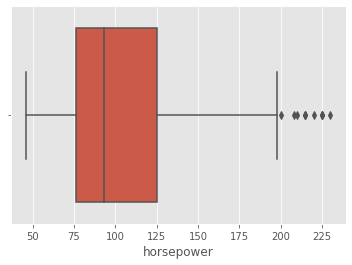

In [62]:
sns.boxplot(x=df_temp1['horsepower'])


<AxesSubplot:xlabel='horsepower', ylabel='Count'>

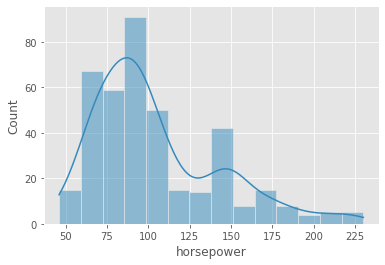

In [63]:
sns.histplot(x=df_temp1['horsepower'], kde=True)

<AxesSubplot:xlabel='acceleration'>

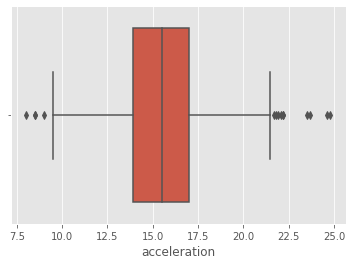

In [64]:
sns.boxplot(x=df_temp1['acceleration'])


<AxesSubplot:xlabel='acceleration', ylabel='Count'>

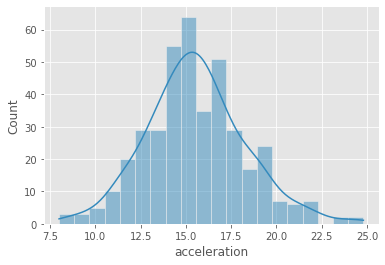

In [65]:
sns.histplot(x=df_temp1['acceleration'], kde=True)

#### Remplazando con la media

In [66]:
df_temp2['horsepower'].fillna(hp_mean, inplace=True)
df_temp2['acceleration'].fillna(acc_mean, inplace=True)


<AxesSubplot:xlabel='horsepower'>

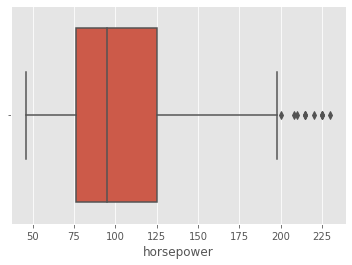

In [67]:
sns.boxplot(x=df_temp2['horsepower'])


<AxesSubplot:xlabel='horsepower', ylabel='Count'>

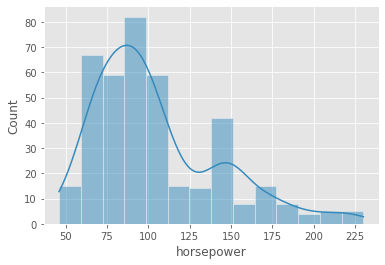

In [68]:
sns.histplot(x=df_temp2['horsepower'], kde=True)

<AxesSubplot:xlabel='acceleration'>

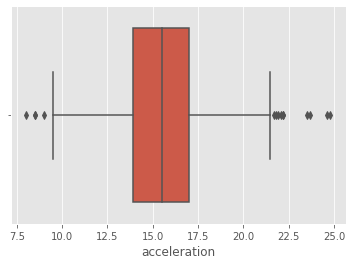

In [69]:
sns.boxplot(x=df_temp2['acceleration'])

<AxesSubplot:xlabel='acceleration', ylabel='Count'>

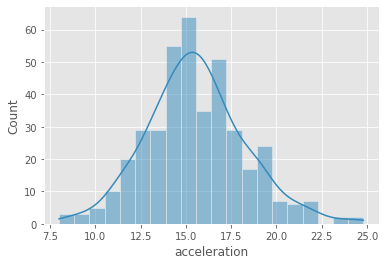

In [70]:
sns.histplot(x=df_temp2['acceleration'], kde=True)


#### Remplazando con la moda

In [71]:
df_temp3['horsepower'].fillna(hp_mode, inplace=True)
df_temp3['acceleration'].fillna(acc_mode, inplace=True)


<AxesSubplot:xlabel='horsepower'>

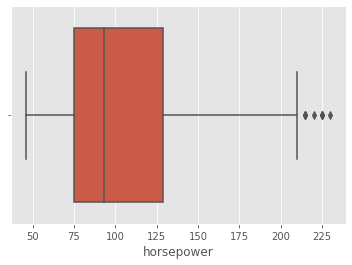

In [72]:
sns.boxplot(x=df_temp3['horsepower'])


<AxesSubplot:xlabel='horsepower', ylabel='Count'>

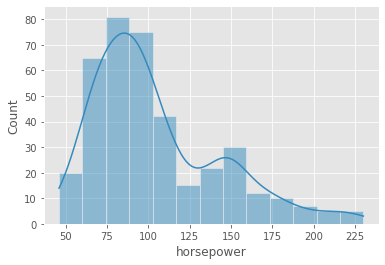

In [73]:
sns.histplot(x=df_temp3['horsepower'], kde=True)

<AxesSubplot:xlabel='acceleration'>

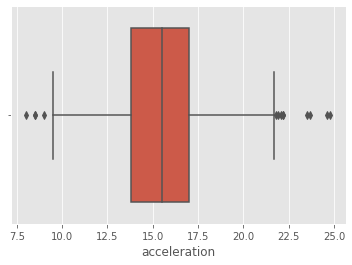

In [74]:
sns.boxplot(x=df_temp3['acceleration'])

<AxesSubplot:xlabel='acceleration', ylabel='Count'>

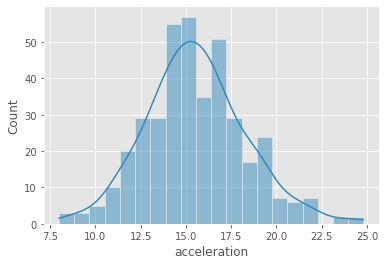

In [75]:
sns.histplot(x=df_temp3['acceleration'], kde=True)

In [76]:
df_join['horsepower'].fillna(hp_median, inplace=True)
df_join['acceleration'].fillna(acc_median, inplace=True)


Una vez que hemos analizado las visualizaciones, notaremos que no hay cambios muy drásticos en la distribución de las variables, esto es porque originalmente solo hay 9 observaciones de `horsepower` y 7 de `acceleration` que tienen como entradas `?`, estos representan el 2.26% y el 1.75% de todas las observaciones de la base de datos. El valor que escojamos no afectará enormemente la distribución general de los datos, aunque por convención suele usarse la media o la mediana (técnicas más especializadas existen).

Para este caso he decidido usar la mediana, ya que es la menos sensible de las 3 a valores atípicos, es fácil de calcular, y funciona bien con bases de datos pequeñas (en este caso son 398 observaciones).

### Descripción de los datos

In [77]:
df_join.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.427136,104.266332,2970.424623,15.549497,76.010050,1.572864
std,7.815984,1.701004,104.268683,38.225361,846.841774,2.731897,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.900000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.000000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


De las estadísticas descriptivas proporcionadas por `pandas` observamos que no hay mucha diferencia entre las medias y las medianas. Esto se verá reflejado en la medición del _skewness_

In [82]:
df_join.skew()


mpg             0.457066
cylinders       0.526922
displacement    0.719663
horsepower      1.108944
weight          0.531063
acceleration    0.296117
model           0.011535
origin          0.923776
dtype: float64

Para todos variables que tenemos en la base de datos, encontramos una _skewness_ positiva, es decir, la cola de todas las distribuciones se encontrará a la derecha.

In [83]:
df_join.kurtosis()

mpg            -0.510781
cylinders      -1.376662
displacement   -0.746569
horsepower      0.766895
weight         -0.785529
acceleration    0.529897
model          -1.181232
origin         -0.817597
dtype: float64

Para el caso de la kurtosis vemos que la mayoría de los valores son negativos, o son cercanos 0, esto nos dice que las distribuciones no son tan _picudas_ sino que tienen una forma más suave.

#### Visualizaciones

<AxesSubplot:xlabel='mpg', ylabel='Count'>

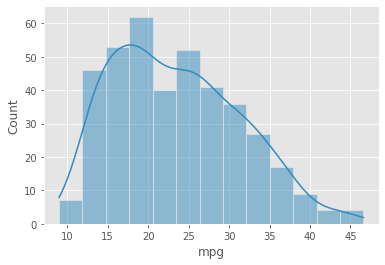

In [85]:
sns.histplot(x=df_join.mpg, kde=True)

<AxesSubplot:xlabel='cylinders', ylabel='Count'>

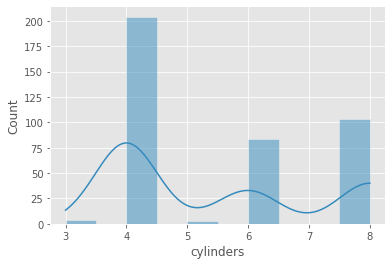

In [86]:
sns.histplot(x=df_join.cylinders, kde=True)

<AxesSubplot:xlabel='displacement', ylabel='Count'>

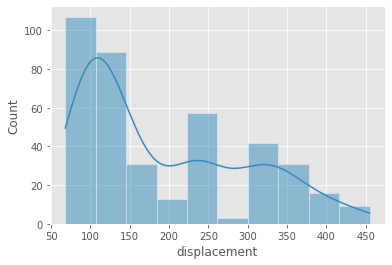

In [87]:
sns.histplot(x=df_join.displacement, kde=True)

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

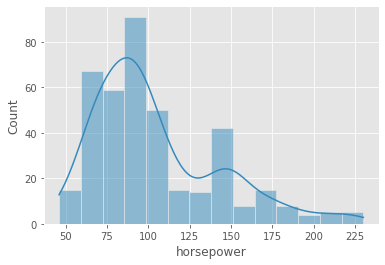

In [90]:
sns.histplot(x=df_join.horsepower, kde=True)

<AxesSubplot:xlabel='weight', ylabel='Count'>

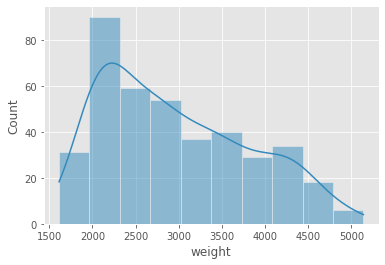

In [91]:
sns.histplot(x=df_join.weight, kde=True)

<AxesSubplot:xlabel='acceleration', ylabel='Count'>

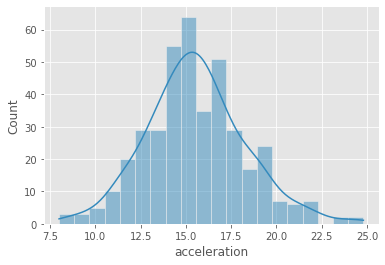

In [92]:
sns.histplot(x=df_join.acceleration, kde=True)

Si bien todas las distribuciones tuvieron el valor de _skewness_ positivo, indicando una cola hacia la derecha, llama la atención en primera instancia que la distribución de `acceleration` se vea bastante _normal_, pero si vemos de nuevo el valor asociado a esta variable, nos daremos cuenta que es el más pequeño de la serie (sin tomar en cuenta la variable `origin`).

<AxesSubplot:xlabel='origin', ylabel='Count'>

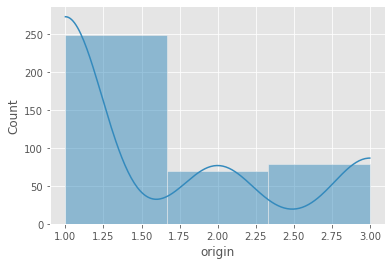

In [93]:
sns.histplot(df_join.origin, bins=3, kde=True)


Observamos que hay una clara mayoría de autos con la etiqueta de `origin` 1

<AxesSubplot:xlabel='model', ylabel='Count'>

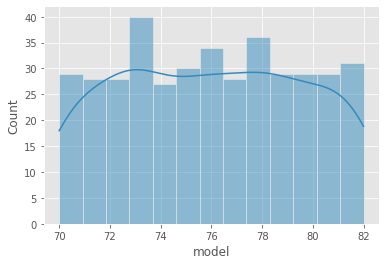

In [94]:
sns.histplot(df_join.model, bins=13, kde=True)


La distribución de los modelos sigue una distribución bastante uniforme, pero hay algunos picos para los modelos de los años 73, 76 y 78.